# Scikit-Learn Practice Exercises

This notebook offers a set of excercises for different tasks with Scikit-Learn.

Notes:
* There may be more than one different way to answer a question or complete an exercise. 
* Some skeleton code has been implemented for you.
* Exercises are based off (and directly taken from) the quick [introduction to Scikit-Learn notebook](https://github.com/mrdbourke/zero-to-mastery-ml/blob/master/section-2-data-science-and-ml-tools/introduction-to-scikit-learn.ipynb).
* Different tasks will be detailed by comments or text. Places to put your own code are defined by `###` (don't remove anything other than `###`).

For further reference and resources, it's advised to check out the [Scikit-Learn documnetation](https://scikit-learn.org/stable/user_guide.html).

And if you get stuck, try searching for a question in the following format: "how to do XYZ with Scikit-Learn", where XYZ is the function you want to leverage from Scikit-Learn.

Since we'll be working with data, we'll import Scikit-Learn's counterparts, Matplotlib, NumPy and pandas.

Let's get started.

In [89]:
# Import the pyplot module of Matplotlib as plt
###
import matplotlib.pyplot as plt

# Import pandas under the abbreviation 'pd'
###
import pandas as pd
# Import NumPy under the abbreviation 'np'
###
import numpy as np

## End-to-end Scikit-Learn classification workflow

Let's start with an end to end Scikit-Learn workflow.

More specifically, we'll:
1. Get a dataset ready
2. Prepare a machine learning model to make predictions
3. Fit the model to the data and make a prediction
4. Evaluate the model's predictions 

The data we'll be using is [stored on GitHub](https://github.com/mrdbourke/zero-to-mastery-ml/tree/master/data). We'll start with [`heart-disease.csv`](https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/heart-disease.csv), a dataset which contains anonymous patient data and whether or not they have heart disease.

**Note:** When viewing a `.csv` on GitHub, make sure it's in the raw format. For example, the URL should look like: https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/heart-disease.csv

### 1. Getting a dataset ready

In [90]:
# Import the heart disease dataset and save it to a variable
# using pandas and read_csv()
# Hint: You can directly pass the URL of a csv to read_csv()
heart_disease = pd.read_csv('heart-disease.csv')

# Check the first 5 rows of the data
###
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Our goal here is to build a machine learning model on all of the columns except `target` to predict `target`.

In essence, the `target` column is our **target variable** (also called `y` or `labels`) and the rest of the other columns are our independent variables (also called `data` or `X`).

And since our target variable is one thing or another (heart disease or not), we know our problem is a classification problem (classifying whether something is one thing or another).

Knowing this, let's create `X` and `y` by splitting our dataframe up.

In [91]:
# Create X (all columns except target)
X = heart_disease.drop('target', axis=1)

# Create y (only the target column)
y = heart_disease['target']

Now we've split our data into `X` and `y`, we'll use Scikit-Learn to split it into training and test sets.

In [92]:
# Import train_test_split from sklearn's model_selection module
###
from sklearn.model_selection import train_test_split

# Use train_test_split to split X & y into training and test sets
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2, random_state=1)

In [93]:
# View the different shapes of the training and test datasets
###
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(242, 13)
(242,)
(61, 13)
(61,)


What do you notice about the different shapes of the data?

Since our data is now in training and test sets, we'll build a machine learning model to fit patterns in the training data and then make predictions on the test data.

To figure out which machine learning model we should use, you can refer to [Scikit-Learn's machine learning map](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html).

After following the map, you decide to use the [`RandomForestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).

### 2. Preparing a machine learning model

In [94]:
# Import the RandomForestClassifier from sklearn's ensemble module
###
from sklearn.ensemble import RandomForestClassifier  

# Instantiate an instance of RandomForestClassifier as clf
clf= RandomForestClassifier(n_estimators= 10, criterion="entropy")   

Now you've got a `RandomForestClassifier` instance, let's fit it to the training data.

Once it's fit, we'll make predictions on the test data.

### 3. Fitting a model and making predictions

In [95]:
# Fit the RandomForestClassifier to the training data
clf.fit(X_train, y_train) 

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [96]:
# Use the fitted model to make predictions on the test data and
# save the predictions to a variable called y_preds
y_preds = clf.predict(X_test)

### 4. Evaluating a model's predictions

Evaluating predictions is as important making them. Let's check how our model did by calling the `score()` method on it and passing it the training (`X_train, y_train`) and testing data (`X_test, y_test`).

In [97]:
# Evaluate the fitted model on the training set using the score() function
###
training_score = clf.score(X_train, y_train)
print(training_score)

0.9917355371900827


In [98]:
# Evaluate the fitted model on the test set using the score() function
###
test_accuracy = clf.score(X_test, y_test)
print(test_accuracy)


0.7213114754098361


* How did you model go? 
* What metric does `score()` return for classifiers? 
* Did your model do better on the training dataset or test dataset?

## Experimenting with different classification models

Now we've quickly covered an end-to-end Scikit-Learn workflow and since experimenting is a large part of machine learning, we'll now try a series of different machine learning models and see which gets the best results on our dataset.

Going through the [Scikit-Learn machine learning map](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html), we see there are a number of different classification models we can try (different models are in the green boxes).

For this exercise, the models we're going to try and compare are:
* [LinearSVC](https://scikit-learn.org/stable/modules/svm.html#classification)
* [KNeighborsClassifier](https://scikit-learn.org/stable/modules/neighbors.html) (also known as K-Nearest Neighbors or KNN)
* [SVC](https://scikit-learn.org/stable/modules/svm.html#classification) (also known as support vector classifier, a form of [support vector machine](https://en.wikipedia.org/wiki/Support-vector_machine))
* [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) (despite the name, this is actually a classifier)
* [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) (an ensemble method and what we used above)

We'll follow the same workflow we used above (except this time for multiple models):
1. Import a machine learning model
2. Get it ready
3. Fit it to the data and make predictions
4. Evaluate the fitted model

**Note:** Since we've already got the data ready, we can reuse it in this section.

In [99]:
# Import LinearSVC from sklearn's svm module
###
from sklearn.svm import LinearSVC

# Import KNeighborsClassifier from sklearn's neighbors module
###
from sklearn.neighbors import KNeighborsClassifier

# Import SVC from sklearn's svm module
###
from sklearn.svm import SVC


# Import LogisticRegression from sklearn's linear_model module
###
from sklearn.linear_model import LogisticRegression


# Note: we don't have to import RandomForestClassifier, since we already have

Thanks to the consistency of Scikit-Learn's API design, we can use virtually the same code to fit, score and make predictions with each of our models.

To see which model performs best, we'll do the following:
1. Instantiate each model in a dictionary
2. Create an empty results dictionary
3. Fit each model on the training data
4. Score each model on the test data
5. Check the results

If you're wondering what it means to instantiate each model in a dictionary, see the example below.

In [100]:
# EXAMPLE: Instantiating a RandomForestClassifier() in a dictionary
example_dict = {"RandomForestClassifier": RandomForestClassifier()}

# Create a dictionary called models which contains all of the classification models we've imported
# Make sure the dictionary is in the same format as example_dict
# The models dictionary should contain 5 models

models = {
    "LinearSVC": LinearSVC(),
    "KNN": KNeighborsClassifier(),
    "SVC": SVC(),
    "LogisticRegression": LogisticRegression(),
    "RandomForestClassifier": RandomForestClassifier()
}

# Create an empty dictionary called results
results = {}

Since each model we're using has the same `fit()` and `score()` functions, we can loop through our models dictionary and, call `fit()` on the training data and then call `score()` with the test data.

In [101]:
# EXAMPLE: Looping through example_dict fitting and scoring the model
example_results = {}
for model_name, model in example_dict.items():
    model.fit(X_train, y_train)
    example_results[model_name] = model.score(X_test, y_test)

# EXAMPLE: View the results
example_results    

{'RandomForestClassifier': 0.7868852459016393}

In [102]:
# Assuming you have already split your data into X_train, y_train, X_test, and y_test

# Loop through the models and fit them to the training data
for model_name, model in models.items():
    model.fit(X_train, y_train)
    results[model_name] = model.score(X_test, y_test)

# Display the results
results


C:\Users\KIIT\ANA\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\KIIT\ANA\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\KIIT\ANA\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LinearSVC': 0.7213114754098361,
 'KNN': 0.5737704918032787,
 'SVC': 0.5573770491803278,
 'LogisticRegression': 0.7704918032786885,
 'RandomForestClassifier': 0.7540983606557377}

* Which model performed the best? 
* Do the results change each time you run the cell? 
* Why do you think this is?

Due to the randomness of how each model finds patterns in the data, you might notice different results each time.

Without manually setting the random state using the `random_state` parameter of some models or using a NumPy random seed, every time you run the cell, you'll get slightly different results.

Let's see this in effect by running the same code as the cell above, except this time setting a [NumPy random seed equal to 42](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.seed.html).

In [103]:
# Run the same code as the cell above, except this time set a NumPy random seed
# equal to 42
import numpy as np

# Set the random seed for reproducibility
np.random.seed(42)

# Assuming you have already split your data into X_train, y_train, X_test, and y_test

# Loop through the models and fit them to the training data
for model_name, model in models.items():
    model.fit(X_train, y_train)
    results[model_name] = model.score(X_test, y_test)

# Display the results
results


C:\Users\KIIT\ANA\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\KIIT\ANA\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\KIIT\ANA\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LinearSVC': 0.7377049180327869,
 'KNN': 0.5737704918032787,
 'SVC': 0.5573770491803278,
 'LogisticRegression': 0.7704918032786885,
 'RandomForestClassifier': 0.7540983606557377}

* Run the cell above a few times, what do you notice about the results? 
* Which model performs the best this time?
* What happens if you add a NumPy random seed to the cell where you called `train_test_split()` (towards the top of the notebook) and then rerun the cell above?

Let's make our results a little more visual.

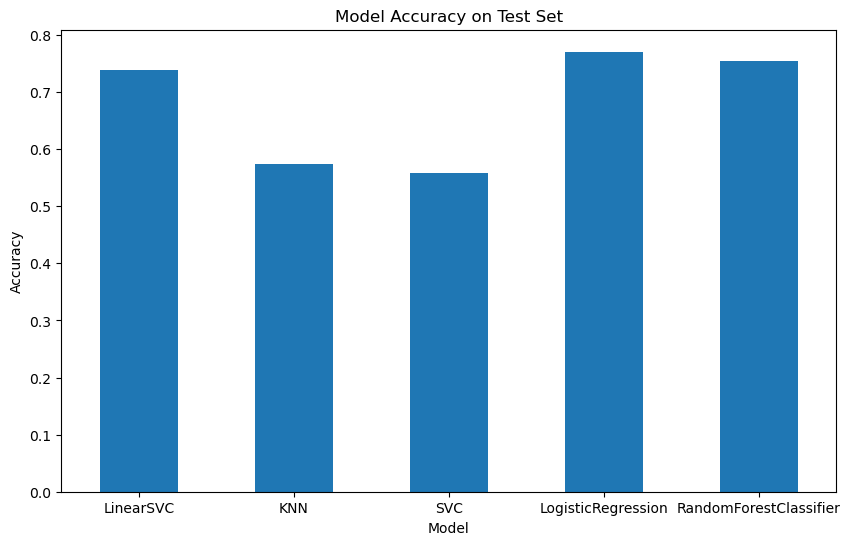

In [104]:
# Create a DataFrame from the results dictionary
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['accuracy'])

# Plot a bar chart
results_df.plot.bar(y='accuracy', legend=False, rot=0, figsize=(10, 6))
plt.title("Model Accuracy on Test Set")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.show()


Using `np.random.seed(42)` results in the `LogisticRegression` model perfoming the best (at least on my computer).

Let's tune its hyperparameters and see if we can improve it.

### Hyperparameter Tuning

Remember, if you're ever trying to tune a machine learning models hyperparameters and you're not sure where to start, you can always search something like "MODEL_NAME hyperparameter tuning".

In the case of LogisticRegression, you might come across articles, such as [Hyperparameter Tuning Using Grid Search by Chris Albon](https://chrisalbon.com/machine_learning/model_selection/hyperparameter_tuning_using_grid_search/).

The article uses [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) but we're going to be using [`RandomizedSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html).

The different hyperparameters to search over have been setup for you in `log_reg_grid` but feel free to change them.

In [105]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

Since we've got a set of hyperparameters we can import `RandomizedSearchCV`, pass it our dictionary of hyperparameters and let it search for the best combination.

In [106]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

# Set the random seed for reproducibility
np.random.seed(42)

# Assuming you have already split your data into X_train, y_train

# Define the hyperparameter grid for Logistic Regression
log_reg_grid = {
    "C": np.logspace(-4, 4, 20),  # Inverse of regularization strength
    "solver": ["liblinear"]  # Solver algorithm (L1 penalty compatible)
}

# Create an instance of RandomizedSearchCV
rs_log_reg = RandomizedSearchCV(
    estimator=LogisticRegression(),
    param_distributions=log_reg_grid,
    cv=5,  # 5-fold cross-validation
    n_iter=5,  # Number of random combinations to try
    verbose=1  # Print progress during search
)

# Fit the RandomizedSearchCV instance to your training data
rs_log_reg.fit(X_train, y_train)


Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=5,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=1)

Once `RandomizedSearchCV` has finished, we can find the best hyperparmeters it found using the `best_params_` attributes.

In [107]:
# Find the best parameters of the RandomizedSearchCV instance using the best_params_ attribute
###
# Access the best parameters found by RandomizedSearchCV
best_parameters = rs_log_reg.best_params_

# Display the best parameters
best_parameters


{'solver': 'liblinear', 'C': 0.23357214690901212}

In [108]:
# Score the instance of RandomizedSearchCV using the test data
###
# Assuming you have already split your data into X_test and y_test

# Get the best estimator (model) from RandomizedSearchCV
best_model = rs_log_reg.best_estimator_

# Evaluate the best model on the test set
test_accuracy = best_model.score(X_test, y_test)
print(f"Test accuracy using best model: {test_accuracy:.4f}")


Test accuracy using best model: 0.7705


After hyperparameter tuning, did the models score improve? What else could you try to improve it? Are there any other methods of hyperparameter tuning you can find for `LogisticRegression`?

### Classifier Model Evaluation

We've tried to find the best hyperparameters on our model using `RandomizedSearchCV` and so far we've only been evaluating our model using the `score()` function which returns accuracy. 

But when it comes to classification, you'll likely want to use a few more evaluation metrics, including:
* [**Confusion matrix**](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/) - Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagnol line).
* [**Cross-validation**](https://scikit-learn.org/stable/modules/cross_validation.html) - Splits your dataset into multiple parts and train and tests your model on each part and evaluates performance as an average. 
* [**Precision**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score) - Proportion of true positives over total number of samples. Higher precision leads to less false positives.
* [**Recall**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score) - Proportion of true positives over total number of true positives and false positives. Higher recall leads to less false negatives.
* [**F1 score**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score) - Combines precision and recall into one metric. 1 is best, 0 is worst.
* [**Classification report**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) - Sklearn has a built-in function called `classification_report()` which returns some of the main classification metrics such as precision, recall and f1-score.
* [**ROC Curve**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_score.html) - [Receiver Operating Characterisitc](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) is a plot of true positive rate versus false positive rate.
* [**Area Under Curve (AUC)**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html) - The area underneath the ROC curve. A perfect model achieves a score of 1.0.

Before we get to these, we'll instantiate a new instance of our model using the best hyerparameters found by `RandomizedSearchCV`. 

In [109]:
# Instantiate a LogisticRegression classifier using the best hyperparameters from RandomizedSearchCV
clf = LogisticRegression(C=0.23357214690901212, solver='liblinear')

# Fit the new instance of LogisticRegression with the best hyperparameters on the training data
clf.fit(X_train, y_train)


LogisticRegression(C=0.23357214690901212, solver='liblinear')

Now it's to import the relative Scikit-Learn methods for each of the classification evaluation metrics we're after.

In [110]:
# Import necessary metrics and functions
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score


Evaluation metrics are very often comparing a model's predictions to some ground truth labels.

Let's make some predictions on the test data using our latest model and save them to `y_preds`.

In [111]:
# Make predictions on test data and save them
###
# Assuming you have a trained Logistic Regression model called 'clf'
y_pred = clf.predict(X_test)
# Save predictions to a CSV file
import pandas as pd
pd.DataFrame(y_pred, columns=['predicted_class']).to_csv('predictions.csv', index=False)


Time to use the predictions our model has made to evaluate it beyond accuracy.

In [112]:
from sklearn.metrics import confusion_matrix

# Assuming you have actual and predicted labels (y_true and y_pred)
c_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print(c_matrix)


[[20 10]
 [ 4 27]]


**Challenge:** The in-built `confusion_matrix` function in Scikit-Learn produces something not too visual, how could you make your confusion matrix more visual?

You might want to search something like "how to plot a confusion matrix". Note: There may be more than one way to do this.

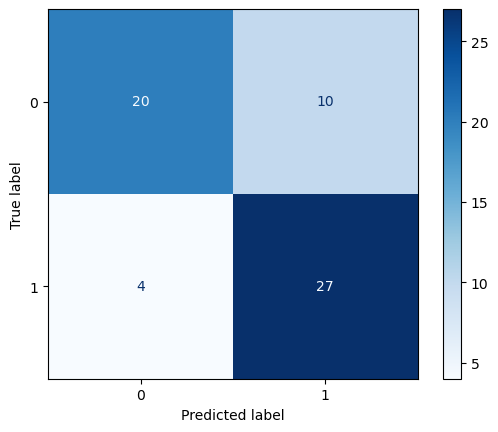

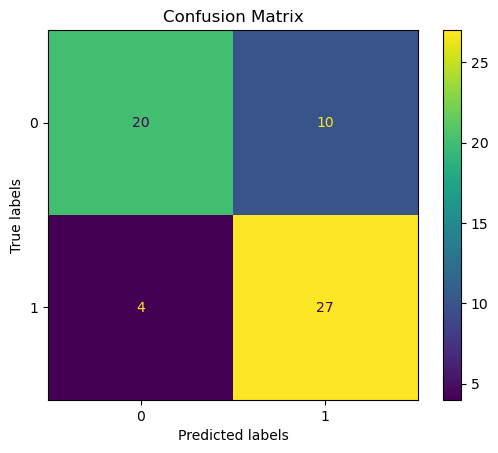

In [113]:
# Create a more visual confusion matrix
###
from sklearn.metrics import ConfusionMatrixDisplay

# Assuming you have actual and predicted labels (y_true and y_pred)
cm_display = ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test, display_labels=[0,1], cmap=plt.cm.Blues, normalize=None)
cm_display.plot()
plt.title("Confusion Matrix")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()


How about a classification report?

In [114]:
# Create a classification report using the classification_report function
###
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have actual and predicted labels (y_true and y_pred)
c_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print("Confusion Matrix:")
print(c_matrix)

# Generate a classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)


Confusion Matrix:
[[20 10]
 [ 4 27]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.67      0.74        30
           1       0.73      0.87      0.79        31

    accuracy                           0.77        61
   macro avg       0.78      0.77      0.77        61
weighted avg       0.78      0.77      0.77        61



**Challenge:** Write down what each of the columns in this classification report are.

* **Precision** - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.
* **Recall** - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.
* **F1 score** - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.
* **Support** - The number of samples each metric was calculated on.
* **Accuracy** - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.
* **Macro avg** - Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn’t class imbalance into effort, so if you do have class imbalances, pay attention to this metric.
* **Weighted avg** - Short for weighted average, the weighted average precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g. will give a high value when one class out performs another due to having more samples).

The classification report gives us a range of values for precision, recall and F1 score, time to find these metrics using Scikit-Learn functions.

In [115]:
# Find the precision score of the model using precision_score()
###
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred)
print(precision)

0.7297297297297297


In [116]:
# Find the recall score
###
recall = recall_score(y_test, y_pred)
print(recall)

0.8709677419354839


In [120]:
# Find the F1 score
###
f1 = f1_score(y_test, y_pred)
print(f1)

0.7941176470588235


Confusion matrix: done.
Classification report: done.
ROC (receiver operator characteristic) curve & AUC (area under curve) score: not done.

Let's fix this.

If you're unfamiliar with what a ROC curve, that's your first challenge, to read up on what one is.

In a sentence, a [ROC curve](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) is a plot of the true positive rate versus the false positive rate.

And the AUC score is the area behind the ROC curve.

Scikit-Learn provides a handy function for creating both of these called [`plot_roc_curve()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html).

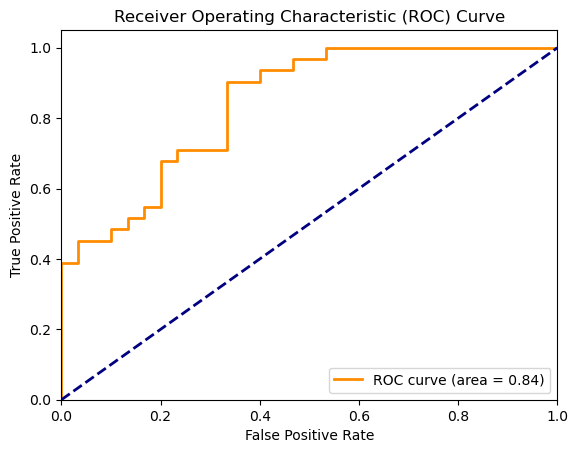

In [121]:
# Plot a ROC curve using our current machine learning model using plot_roc_curve
###
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming you have access to the trained classifier (clf) and test data (X_test, y_test)

# Get predicted probabilities
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Beautiful! We've gone far beyond accuracy with a plethora extra classification evaluation metrics.

If you're not sure about any of these, don't worry, they can take a while to understand. That could be an optional extension, reading up on a classification metric you're not sure of.

The thing to note here is all of these metrics have been calculated using a single training set and a single test set. Whilst this is okay, a more robust way is to calculate them using [cross-validation](https://scikit-learn.org/stable/modules/cross_validation.html).

We can calculate various evaluation metrics using cross-validation using Scikit-Learn's [`cross_val_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) function along with the `scoring` parameter.

In [122]:
# Import cross_val_score from sklearn's model_selection module
###
# Import cross_val_score from sklearn's model_selection module
from sklearn.model_selection import cross_val_score


In [123]:
# EXAMPLE: By default cross_val_score returns 5 values (cv=5).
cross_val_score(clf, 
                X, 
                y, 
                scoring="accuracy",
                cv=5)

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [124]:
# EXAMPLE: Taking the mean of the returned values from cross_val_score 
# gives a cross-validated version of the scoring metric.
cross_val_acc = np.mean(cross_val_score(clf,
                                        X,
                                        y,
                                        scoring="accuracy",
                                        cv=5))

cross_val_acc

0.8479781420765027

In the examples, the cross-validated accuracy is found by taking the mean of the array returned by `cross_val_score()`.

Now it's time to find the same for precision, recall and F1 score.

In [125]:
# Find the cross-validated precision
###
# Importing necessary libraries
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, precision_score

# Assuming you have access to your classifier (clf) and training data (X_train, y_train)

# Define a custom scorer for precision
precision_scorer = make_scorer(precision_score)

# Perform cross-validation to calculate precision
cross_val_precision = cross_val_score(clf, X_train, y_train, cv=5, scoring=precision_scorer)

# Calculate the mean of cross-validated precision
mean_precision = cross_val_precision.mean()

print("Cross-validated Precision:", mean_precision)


Cross-validated Precision: 0.8276232851316276


In [126]:
# Find the cross-validated recall
###
# Importing necessary libraries
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, recall_score

# Assuming you have access to your classifier (clf) and training data (X_train, y_train)

# Define a custom scorer for recall
recall_scorer = make_scorer(recall_score)

# Perform cross-validation to calculate recall
cross_val_recall = cross_val_score(clf, X_train, y_train, cv=5, scoring=recall_scorer)

# Calculate the mean of cross-validated recall
mean_recall = cross_val_recall.mean()

print("Cross-validated Recall:", mean_recall)


Cross-validated Recall: 0.9256410256410257


In [127]:
# Find the cross-validated F1 score
###
# Importing necessary libraries
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score

# Assuming you have access to your classifier (clf) and training data (X_train, y_train)

# Define a custom scorer for F1 score
f1_scorer = make_scorer(f1_score)

# Perform cross-validation to calculate F1 score
cross_val_f1 = cross_val_score(clf, X_train, y_train, cv=5, scoring=f1_scorer)

# Calculate the mean of cross-validated F1 score
mean_f1 = cross_val_f1.mean()

print("Cross-validated F1 Score:", mean_f1)


Cross-validated F1 Score: 0.8736453201970443


### Exporting and importing a trained model

Once you've trained a model, you may want to export it and save it to file so you can share it or use it elsewhere.

One method of exporting and importing models is using the joblib library.

In Scikit-Learn, exporting and importing a trained model is known as [model persistence](https://scikit-learn.org/stable/modules/model_persistence.html).

In [128]:

from joblib import dump, load


In [129]:

# Importing necessary function
from joblib import dump

# Export the trained model to a file
dump(clf, 'trained_model.joblib')


['trained_model.joblib']

In [130]:

# Importing necessary function
from joblib import load

# Load the trained model from the file
loaded_model = load('trained_model.joblib')

# Assuming you have access to your test data (X_test, y_test)

# Evaluate the loaded trained model on the test data
accuracy = loaded_model.score(X_test, y_test)
print("Accuracy of the loaded trained model on test data:", accuracy)


Accuracy of the loaded trained model on test data: 0.7704918032786885


What do you notice about the loaded trained model results versus the original (pre-exported) model results?


## Scikit-Learn Regression Practice

For the next few exercises, we're going to be working on a regression problem, in other words, using some data to predict a number.

Our dataset is a [table of car sales](https://docs.google.com/spreadsheets/d/1LPEIWJdSSJYrfn-P3UQDIXbEn5gg-o6I7ExLrWTTBWs/edit?usp=sharing), containing different car characteristics as well as a sale price.

We'll use Scikit-Learn's built-in regression machine learning models to try and learn the patterns in the car characteristics and their prices on a certain group of the dataset before trying to predict the sale price of a group of cars the model has never seen before.

To begin, we'll [import the data from GitHub](https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/car-sales-extended-missing-data.csv) into a pandas DataFrame, check out some details about it and try to build a model as soon as possible.

In [131]:
import pandas as pd

# Read in the car sales data
car_sales = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/car-sales-extended-missing-data.csv")

# View the first 5 rows of the car sales data
print(car_sales.head())


     Make Colour  Odometer (KM)  Doors    Price
0   Honda  White        35431.0    4.0  15323.0
1     BMW   Blue       192714.0    5.0  19943.0
2   Honda  White        84714.0    4.0  28343.0
3  Toyota  White       154365.0    4.0  13434.0
4  Nissan   Blue       181577.0    3.0  14043.0


In [132]:
# Get information about the car sales DataFrame
###
print(car_sales.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           951 non-null    object 
 1   Colour         950 non-null    object 
 2   Odometer (KM)  950 non-null    float64
 3   Doors          950 non-null    float64
 4   Price          950 non-null    float64
dtypes: float64(3), object(2)
memory usage: 39.2+ KB
None


Looking at the output of `info()`,
* How many rows are there total?
* What datatypes are in each column?
* How many missing values are there in each column?

In [133]:
# Find number of missing values in each column
###
print(car_sales.isnull().sum())

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64


In [134]:
# Find the datatypes of each column of car_sales
###
print(car_sales.dtypes)

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object


Knowing this information, what would happen if we tried to model our data as it is?

Let's see.

In [135]:
# EXAMPLE: This doesn't work because our car_sales data isn't all numerical
from sklearn.ensemble import RandomForestRegressor
car_sales_X, car_sales_y = car_sales.drop("Price", axis=1), car_sales.Price
rf_regressor = RandomForestRegressor().fit(car_sales_X, car_sales_y)

ValueError: could not convert string to float: 'Honda'

As we see, the cell above breaks because our data contains non-numerical values as well as missing data.

To take care of some of the missing data, we'll remove the rows which have no labels (all the rows with missing values in the `Price` column).

In [147]:
# Remove rows with no labels (NaN's in the Price column)
###
# Remove rows with no labels (NaNs in the Price column)
car_sales = car_sales.dropna(subset=['Price'])

# Check the shape of the DataFrame after removing rows
print("Shape of DataFrame after removing rows with NaNs in Price column:", car_sales.shape)


Shape of DataFrame after removing rows with NaNs in Price column: (950, 5)


### Building a pipeline
Since our `car_sales` data has missing numerical values as well as the data isn't all numerical, we'll have to fix these things before we can fit a machine learning model on it.

There are ways we could do this with pandas but since we're practicing Scikit-Learn, we'll see how we might do it with the [`Pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) class. 

Because we're modifying columns in our dataframe (filling missing values, converting non-numerical data to numbers) we'll need the [`ColumnTransformer`](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html), [`SimpleImputer`](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html) and [`OneHotEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) classes as well.

Finally, because we'll need to split our data into training and test sets, we'll import `train_test_split` as well.

In [148]:


# Import Pipeline from sklearn's pipeline module
from sklearn.pipeline import Pipeline

# Import ColumnTransformer from sklearn's compose module
from sklearn.compose import ColumnTransformer

# Import SimpleImputer from sklearn's impute module
from sklearn.impute import SimpleImputer

# Import OneHotEncoder from sklearn's preprocessing module
from sklearn.preprocessing import OneHotEncoder

# Import train_test_split from sklearn's model_selection module
from sklearn.model_selection import train_test_split


Now we've got the necessary tools we need to create our preprocessing `Pipeline` which fills missing values along with turning all non-numerical data into numbers.

Let's start with the categorical features.

In [149]:
# Define different categorical features
categorical_features = ["Make", "Colour"]

# Create categorical transformer Pipeline
categorical_transformer = Pipeline(steps=[
    # Set SimpleImputer strategy to "constant" and fill value to "missing"
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    # Set OneHotEncoder to ignore the unknowns
    ("onehot", OneHotEncoder(handle_unknown='ignore'))])


It would be safe to treat `Doors` as a categorical feature as well, however since we know the vast majority of cars have 4 doors, we'll impute the missing `Doors` values as 4.

In [150]:
door_feature = ["Doors"]

# Create Doors transformer Pipeline
door_transformer = Pipeline(steps=[
    # Set SimpleImputer strategy to "constant" and fill value to 4
    ("imputer", SimpleImputer(strategy="constant", fill_value=4))])


Now onto the numeric features. In this case, the only numeric feature is the `Odometer (KM)` column. Let's fill its missing values with the median.

In [151]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

numeric_features = ["Odometer (KM)"]

# Create numeric transformer pipeline
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median"))  # Fill with median
])

In [152]:
preprocessor = ColumnTransformer(
  transformers=[
    # Use the categorical_transformer to transform the categorical_features
    ("cat", categorical_transformer, categorical_features),  # Replace with your list of categorical features
    # Use the door_transformer to transform the door_feature
    ("door", door_transformer, door_feature),                 # Replace with your door feature name
    # Use the numeric_transformer to transform the numeric_features
    ("num", numeric_transformer, numeric_features)          # Replace with your list of numeric features
  ]
)


Time to put all of our individual transformer `Pipeline`'s into a single `ColumnTransformer` instance.

In [153]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Define your categorical features (replace with actual names)
categorical_features = ["Make", "Colour"]

# Define your door feature (replace with actual name)
door_feature = ["Doors"]

# Create preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        # Categorical features - One-Hot Encoding
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),

        # Door feature - String-to-integer mapping (replace if needed)
        ("door", Pipeline(steps=[
            ("imputer", SimpleImputer(strategy="constant", fill_value=4)),  # Adjust fill value as needed
        ]), door_feature),

        # Numeric features - Imputation with median strategy (replace if needed)
        ("num", SimpleImputer(strategy="median"), numeric_features)  # Replace with your list of numeric features
    ]
)


Boom! Now our `preprocessor` is ready, time to import some regression models to try out.

Comparing our data to the [Scikit-Learn machine learning map](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html), we can see there's a handful of different regression models we can try.

* [RidgeRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)
* [SVR(kernel="linear")](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html) - short for Support Vector Regressor, a form form of support vector machine.
* [SVR(kernel="rbf")](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html) - short for Support Vector Regressor, a form of support vector machine.
* [RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) - the regression version of RandomForestClassifier.

In [154]:
from sklearn.linear_model import Ridge

# Import SVR from sklearn.svm
from sklearn.svm import SVR

# Import RandomForestRegressor from sklearn.ensemble
from sklearn.ensemble import RandomForestRegressor

print("Ridge, SVR, and RandomForestRegressor are all imported successfully!")


Ridge, SVR, and RandomForestRegressor are all imported successfully!


Again, thanks to the design of the Scikit-Learn library, we're able to use very similar code for each of these models.

To test them all, we'll create a dictionary of regression models and an empty dictionary for regression model results.

In [155]:
from sklearn.linear_model import Ridge

# Import SVR from sklearn.svm
from sklearn.svm import SVR

# Import RandomForestRegressor from sklearn.ensemble
from sklearn.ensemble import RandomForestRegressor

# Create dictionary of regression models
regression_models = {
    "Ridge": Ridge(),
    "SVR_linear": SVR(kernel="linear"),  # SVR with linear kernel
    "SVR_rbf": SVR(kernel="rbf"),  # SVR with radial basis function (RBF) kernel
    "RandomForestRegressor": RandomForestRegressor()
}

# Create an empty dictionary for regression results
regression_results = {}


Our regression model dictionary is prepared as well as an empty dictionary to append results to, time to get the data split into `X` (feature variables) and `y` (target variable) as well as training and test sets.

In our car sales problem, we're trying to use the different characteristics of a car (`X`) to predict its sale price (`y`).

In [156]:
# Select all columns except "Price" (assuming "Price" is the last column)
car_sales_X = car_sales.iloc[:, :-1]
# Select the "Price" column
car_sales_y = car_sales["Price"]


In [157]:

from sklearn.model_selection import train_test_split

# Split data into training and test sets (test_size=0.2 for 20% test data, random_state=42 for reproducibility)
car_X_train, car_X_test, car_y_train, car_y_test = train_test_split(car_sales_X, car_sales_y, test_size=0.2, random_state=42)

# Check the shapes of the training and test datasets
print("Training data X shape:", car_X_train.shape)
print("Training data y shape:", car_y_train.shape)
print("Test data X shape:", car_X_test.shape)
print("Test data y shape:", car_y_test.shape)


Training data X shape: (760, 4)
Training data y shape: (760,)
Test data X shape: (190, 4)
Test data y shape: (190,)


* How many rows are in each set?
* How many columns are in each set?

Alright, our data is split into training and test sets, time to build a small loop which is going to:
1. Go through our `regression_models` dictionary
2. Create a `Pipeline` which contains our `preprocessor` as well as one of the models in the dictionary
3. Fits the `Pipeline` to the car sales training data
4. Evaluates the target model on the car sales test data and appends the results to our `regression_results` dictionary

In [158]:

        
# Loop through the models in the dictionary
for model_name, model in regression_models.items():

    # Create a model pipeline with preprocessor and model steps
    model_pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),  # Replace with your preprocessor object
        ("model", model)  # Use the model instance from the dictionary
    ])

    # Fit the model pipeline to the training data
    print(f"Fitting {model_name}...")
    model_pipeline.fit(car_X_train, car_y_train)  # Replace with your training data

    # Score the model pipeline on the test data and store the result
    print(f"Scoring {model_name}...")
    regression_results[model_name] = model_pipeline.score(car_X_test, car_y_test)  # Replace with your test data


Fitting Ridge...
Scoring Ridge...
Fitting SVR_linear...
Scoring SVR_linear...
Fitting SVR_rbf...
Scoring SVR_rbf...
Fitting RandomForestRegressor...
Scoring RandomForestRegressor...


Our regression models have been fit, let's see how they did!

In [159]:
# Check the results of each regression model by printing the regression_results
# dictionary
###
# Print the results of each regression model
print("Regression Results:")
for model_name, score in regression_results.items():
    print(f"{model_name}: {score:.4f}")  # Format score to 4 decimal places


Regression Results:
Ridge: 0.2540
SVR_linear: -0.4895
SVR_rbf: 0.0019
RandomForestRegressor: 0.2291


* Which model did the best?
* How could you improve its results?
* What metric does the `score()` method of a regression model return by default?

Since we've fitted some models but only compared them via the default metric contained in the `score()` method (R^2 score or coefficient of determination), let's take the `RidgeRegression` model and evaluate it with a few other [regression metrics](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics).

Specifically, let's find:
1. **R^2 (pronounced r-squared) or coefficient of determination** - Compares your models predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, its R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1. 
2. **Mean absolute error (MAE)** - The average of the absolute differences between predictions and actual values. It gives you an idea of how wrong your predictions were.
3. **Mean squared error (MSE)** - The average squared differences between predictions and actual values. Squaring the errors removes negative errors. It also amplifies outliers (samples which have larger errors).

Scikit-Learn has a few classes built-in which are going to help us with these, namely, [`mean_absolute_error`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html), [`mean_squared_error`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) and [`r2_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html).

In [160]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

All the evaluation metrics we're concerned with compare a model's predictions with the ground truth labels. Knowing this, we'll have to make some predictions.

Let's create a `Pipeline` with the `preprocessor` and a `Ridge()` model, fit it on the car sales training data and then make predictions on the car sales test data.

In [161]:
# Create Ridge Regression Pipeline
ridge_pipeline = Pipeline(steps=[("preprocessor", preprocessor), ("model", Ridge())])

# Fit the RidgeRegression Pipeline to the training data
ridge_pipeline.fit(car_X_train, car_y_train)  # Replace with your training data

# Make predictions on the test data using the RidgeRegression Pipeline
car_y_preds = ridge_pipeline.predict(car_X_test)  # Replace with your test data

# View the first 50 predictions
print("First 50 predicted car prices:")
print(car_y_preds[:50])


First 50 predicted car prices:
[18514.480873   22204.86580267 11045.72092225  6891.87687957
  8793.93970278 10926.96786577 15267.76229871 13834.80312146
 20207.44377898 14412.59968701  6216.01228306 16543.06707068
 11783.69374936 13492.13284255 14321.17899086 16425.45131776
 15999.88230172  9925.04252351 11576.64865889 11580.55130633
 10647.22402588 13113.54464064 17874.90033257 23447.29246732
 11797.33019118 14481.85336505 18430.527126   14680.33044208
 20585.63901269 19953.91395769 18163.1170151  22366.43390174
 12435.69707467 14265.25495748 18351.62656383 19564.58267503
 12213.05747919 12479.20772529 18677.93478691 11284.89072638
 15278.54001605 17378.81425165 19247.77623181 17343.90692672
 15048.12797569 12724.44477165 12389.86021752  8475.63778401
 15255.49324105 18602.79970861]


Nice! Now we've got some predictions, time to evaluate them. We'll find the mean squared error (MSE), mean absolute error (MAE) and R^2 score (coefficient of determination) of our model.

In [162]:
# EXAMPLE: Find the MSE by comparing the car sales test labels to the car sales predictions
mse = mean_squared_error(car_y_test, car_y_preds)
# Return the MSE
mse

49950182.63337459

In [163]:
from sklearn.metrics import mean_absolute_error

# Calculate MAE
mae = mean_absolute_error(car_y_test, car_y_preds)

# Print or return MAE (depending on your preference)
print(f"Mean Absolute Error (MAE): {mae:.2f}")  # Format MAE to 2 decimal places
# OR
# return mae


Mean Absolute Error (MAE): 5713.82


In [164]:
from sklearn.metrics import r2_score

# Calculate R-squared score
r2 = r2_score(car_y_test, car_y_preds)

# Print or return R-squared score (depending on your preference)
print(f"R-squared score: {r2:.4f}")  # Format R^2 to 4 decimal places


R-squared score: 0.2540


Boom! Our model could potentially do with some hyperparameter tuning (this would be a great extension). And we could probably do with finding some more data on our problem, 1000 rows doesn't seem to be sufficient.

* How would you export the trained regression model?

## Extensions

You should be proud. Getting this far means you've worked through a classification problem and regression problem using pure (mostly) Scikit-Learn (no easy feat!).

For more exercises, check out the [Scikit-Learn getting started documentation](https://scikit-learn.org/stable/getting_started.html). A good practice would be to read through it and for the parts you find interesting, add them into the end of this notebook.

Finally, as always, remember, the best way to learn something new is to try it. And try it relentlessly. If you're unsure of how to do something, never be afraid to ask a question or search for something such as, "how to tune the hyperparmaters of a scikit-learn ridge regression model".